In [1]:
# First let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv('movies.csv')


In [2]:
# Let's look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Looking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f"{col} - {pct_missing}%")

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# so there are some missing values. We will drop those rows with missing values

df = df.dropna(how='any',axis=0) 

In [5]:
# Data types of our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
## Changing data types
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100


In [7]:
df.sample(20)   

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
929,The Big Easy,R,Comedy,1986,"August 21, 1987 (United States)",6.5,12000,Jim McBride,Daniel Petrie Jr.,Dennis Quaid,United States,8500000,17685307,Kings Road Entertainment,102
3703,The Replacements,PG-13,Comedy,2000,"August 11, 2000 (United States)",6.6,60000,Howard Deutch,Vince McKewin,Keanu Reeves,United States,50000000,50054511,Bel Air Entertainment,118
2304,A Perfect World,PG-13,Crime,1993,"November 24, 1993 (United States)",7.5,76000,Clint Eastwood,John Lee Hancock,Kevin Costner,United States,30000000,135130999,Warner Bros.,138
6146,Mirror Mirror,PG,Adventure,2012,"March 30, 2012 (United States)",5.6,85000,Tarsem Singh,Marc Klein,Lily Collins,United States,85000000,183018522,Relativity Media,106
6303,Stoker,R,Drama,2013,"March 1, 2013 (United Kingdom)",6.8,105000,Park Chan-Wook,Wentworth Miller,Mia Wasikowska,United Kingdom,12000000,12077441,Fox Searchlight Pictures,99
3563,Ride with the Devil,R,Drama,1999,"November 5, 1999 (United Kingdom)",6.7,13000,Ang Lee,Daniel Woodrell,Tobey Maguire,United States,38000000,635096,Universal Pictures,138
5585,Whatever Works,PG-13,Comedy,2009,"July 3, 2009 (United States)",7.1,72000,Woody Allen,Woody Allen,Evan Rachel Wood,United States,15000000,36020534,Sony Pictures Classics,93
6902,Inferno,PG-13,Action,2016,"October 28, 2016 (United States)",6.2,165000,Ron Howard,Dan Brown,Tom Hanks,United States,75000000,220021259,Columbia Pictures,121
1466,Glory,R,Biography,1989,"February 16, 1990 (United States)",7.8,126000,Edward Zwick,Kevin Jarre,Matthew Broderick,United States,18000000,26979166,TriStar Pictures,122
3480,Big Daddy,PG-13,Comedy,1999,"June 25, 1999 (United States)",6.4,205000,Dennis Dugan,Steve Franks,Adam Sandler,United States,34200000,234801895,Jack Giarraputo Productions,93


In [8]:
# As we can see the year in 'year' column and year in 'release' column don't match
# Creating a new column yearCorrect

df['yearCorrect'] = df['released'].astype(str).str.split(', ').str[-1].astype(str).str[:4]

In [9]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,2020


In [10]:
# Let's check out some of the highest grossing movies

df.sort_values(by = ['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85,1982


In [11]:
# looking for duplicates values
duplicate = df[df.duplicated()]
duplicate

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect


In [12]:
# There are no duplicate rows in this dataset.

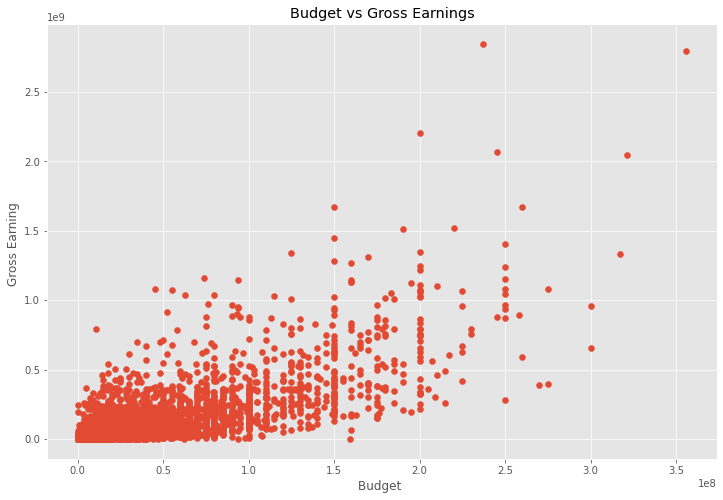

In [13]:
# Scatter plot of budget vs gross

plt.scatter(x = df['budget'], y = df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget ')
plt.ylabel('Gross Earning ');

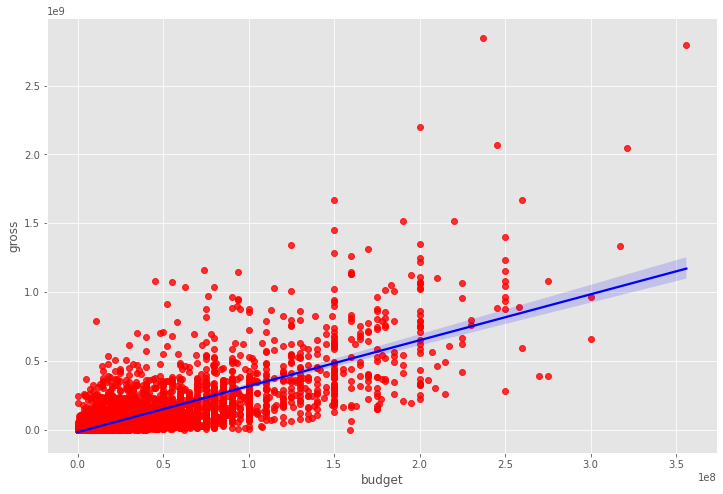

In [14]:
# plot  budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {'color':'red'}, line_kws = {'color':'blue'});

In [15]:
# Let's look at the correlation between different columns

correlation_matrix = df.corr(method = 'pearson')
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


We can see there high correlation between gross earning and budget of the movie.

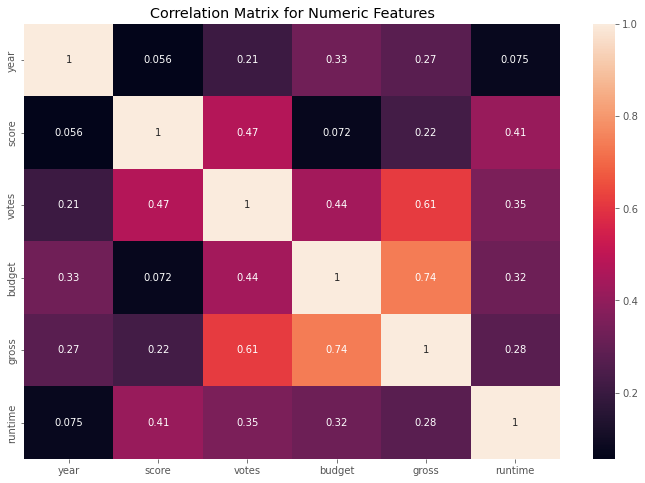

In [16]:
# Heatmap
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features');

In [17]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect
name,1.000000,0.169808,0.028413,0.965461,0.966086,-0.020083,0.297305,0.725411,0.791872,0.695124,0.098110,0.288955,0.967925,0.535369,0.048980,0.916533
rating,0.169808,1.000000,-0.116507,0.179456,0.171063,0.036114,0.097619,0.096014,0.128909,0.115694,-0.004547,0.203698,0.172703,-0.026286,0.032265,0.175227
genre,0.028413,-0.116507,1.000000,0.031765,0.031251,-0.027402,-0.009983,0.036671,0.033975,0.045497,-0.003314,0.020893,0.032033,0.015127,0.000056,0.031627
year,0.965461,0.179456,0.031765,1.000000,0.996490,-0.014594,0.323916,0.747785,0.812386,0.719373,0.095073,0.319135,0.996371,0.537731,0.055864,0.950025
released,0.966086,0.171063,0.031251,0.996490,1.000000,-0.019486,0.313254,0.750825,0.809858,0.720076,0.096807,0.309616,0.998490,0.546033,0.049650,0.939874
score,-0.020083,0.036114,-0.027402,-0.014594,-0.019486,1.000000,-0.041981,-0.006583,-0.021538,0.015108,0.016567,-0.005493,-0.015744,-0.008555,0.011831,-0.010310
votes,0.297305,0.097619,-0.009983,0.323916,0.313254,-0.041981,1.000000,0.187909,0.225105,0.182043,-0.021562,0.359065,0.307248,0.007423,0.126362,0.316306
director,0.725411,0.096014,0.036671,0.747785,0.750825,-0.006583,0.187909,1.000000,0.717990,0.636705,0.095349,0.124051,0.751737,0.483737,-0.026918,0.703853
writer,0.791872,0.128909,0.033975,0.812386,0.809858,-0.021538,0.225105,0.717990,1.000000,0.626647,0.098623,0.208088,0.811356,0.477503,0.023123,0.779839
star,0.695124,0.115694,0.045497,0.719373,0.720076,0.015108,0.182043,0.636705,0.626647,1.000000,0.098071,0.138015,0.720811,0.442307,0.033297,0.680884


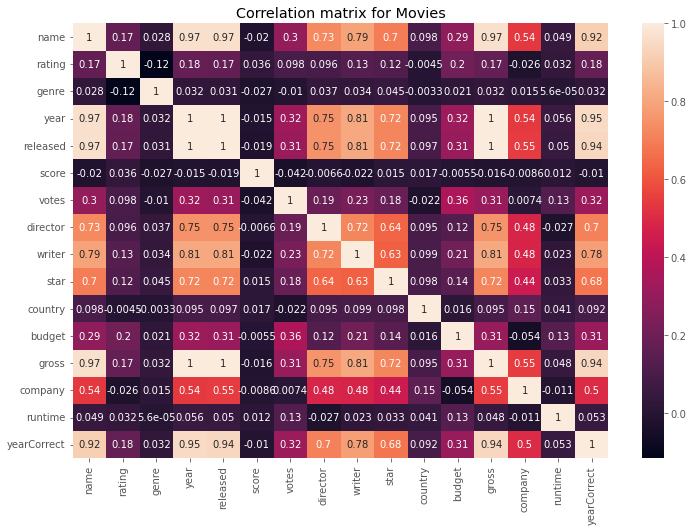

In [18]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies");

In [19]:
correlation_matrix

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect
name,1.000000,0.169808,0.028413,0.965461,0.966086,-0.020083,0.297305,0.725411,0.791872,0.695124,0.098110,0.288955,0.967925,0.535369,0.048980,0.916533
rating,0.169808,1.000000,-0.116507,0.179456,0.171063,0.036114,0.097619,0.096014,0.128909,0.115694,-0.004547,0.203698,0.172703,-0.026286,0.032265,0.175227
genre,0.028413,-0.116507,1.000000,0.031765,0.031251,-0.027402,-0.009983,0.036671,0.033975,0.045497,-0.003314,0.020893,0.032033,0.015127,0.000056,0.031627
year,0.965461,0.179456,0.031765,1.000000,0.996490,-0.014594,0.323916,0.747785,0.812386,0.719373,0.095073,0.319135,0.996371,0.537731,0.055864,0.950025
released,0.966086,0.171063,0.031251,0.996490,1.000000,-0.019486,0.313254,0.750825,0.809858,0.720076,0.096807,0.309616,0.998490,0.546033,0.049650,0.939874
score,-0.020083,0.036114,-0.027402,-0.014594,-0.019486,1.000000,-0.041981,-0.006583,-0.021538,0.015108,0.016567,-0.005493,-0.015744,-0.008555,0.011831,-0.010310
votes,0.297305,0.097619,-0.009983,0.323916,0.313254,-0.041981,1.000000,0.187909,0.225105,0.182043,-0.021562,0.359065,0.307248,0.007423,0.126362,0.316306
director,0.725411,0.096014,0.036671,0.747785,0.750825,-0.006583,0.187909,1.000000,0.717990,0.636705,0.095349,0.124051,0.751737,0.483737,-0.026918,0.703853
writer,0.791872,0.128909,0.033975,0.812386,0.809858,-0.021538,0.225105,0.717990,1.000000,0.626647,0.098623,0.208088,0.811356,0.477503,0.023123,0.779839
star,0.695124,0.115694,0.045497,0.719373,0.720076,0.015108,0.182043,0.636705,0.626647,1.000000,0.098071,0.138015,0.720811,0.442307,0.033297,0.680884


In [22]:
corr_pairs = correlation_matrix.unstack()

sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head(20)

rating    genre      -0.116507
genre     rating     -0.116507
budget    company    -0.053573
company   budget     -0.053573
score     votes      -0.041981
votes     score      -0.041981
genre     score      -0.027402
score     genre      -0.027402
runtime   director   -0.026918
director  runtime    -0.026918
rating    company    -0.026286
company   rating     -0.026286
country   votes      -0.021562
votes     country    -0.021562
writer    score      -0.021538
score     writer     -0.021538
          name       -0.020083
name      score      -0.020083
score     released   -0.019486
released  score      -0.019486
dtype: float64